In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read in data

In [2]:
folder = 'data/'

Seeds_24 = pd.read_csv(folder + '2024_tourney_seeds.csv') # not needed
Teams = pd.read_csv(folder + 'MTeams.csv') # not needed


# important

Seeds = pd.read_csv(folder + 'MNCAATourneySeeds.csv')
Conferences = pd.read_csv(folder + 'MTeamConferences.csv')
RegularSeason = pd.read_csv(folder + 'MRegularSeasonDetailedResults.csv')
TourneyCompact = pd.read_csv(folder + 'MNCAATourneyCompactResults.csv')

display(RegularSeason)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,2024,114,1454,75,1237,70,A,0,25,57,...,13,16,23,7,19,15,13,7,2,21
112500,2024,114,1455,74,1412,66,A,0,27,54,...,16,15,22,9,21,15,12,8,3,12
112501,2024,114,1459,91,1359,69,H,0,32,59,...,24,20,28,10,18,10,14,6,0,19
112502,2024,114,1462,91,1177,58,H,0,35,67,...,19,11,14,5,25,11,18,6,4,12


# Example of how to see a team's results

In [3]:
# Filter for the 2024 season
games_2024 = RegularSeason[RegularSeason['Season'] == 2024]

# Merge to get the winning team names
games_with_win_names = pd.merge(games_2024, Teams[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID', how='left')
games_with_win_names.rename(columns={'TeamName': 'WTeamName'}, inplace=True)

# Merge to get the losing team names
games_with_both_names = pd.merge(games_with_win_names, Teams[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID', how='left', suffixes=('', '_L'))
games_with_both_names.rename(columns={'TeamName': 'LTeamName'}, inplace=True)

# Filter for games involving Texas
texas_games = games_with_both_names[(games_with_both_names['WTeamName'] == 'Texas') | (games_with_both_names['LTeamName'] == 'Texas')]

# Select columns to display, including opponent name
# Assuming you want to see the season, winning and losing team names, and scores for context
texas_games = texas_games[['Season', 'WTeamName', 'LTeamName', 'WScore', 'LScore']]

# Show the games
display(texas_games)

,Season,WTeamName,LTeamName,WScore,LScore
89,2024,Texas,Incarnate Word,88,56
230,2024,Texas,Delaware St,86,59
428,2024,Texas,Rice,80,64
636,2024,Texas,Louisville,81,80
659,2024,Connecticut,Texas,81,71
994,2024,Texas,Wyoming,86,63
1138,2024,Texas,Texas St,77,58
1369,2024,Marquette,Texas,86,65
1503,2024,Texas,Houston Chr,77,50
1687,2024,Texas,LSU,96,85


# Generate team database

In [4]:
WinTeams = pd.DataFrame()
LossTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

# set up wins dataframe
WinTeams[columns] = RegularSeason[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

WinTeams['Wins'] = 1
WinTeams['Losses'] = 0

# set up losses dataframe
LossTeams[columns] = RegularSeason[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

LossTeams['Loc'] = LossTeams['Loc'].apply(lambda loc: 'A' if loc == 'H' else ('H' if loc == 'A' else 'N'))



LossTeams['Wins'] = 0
LossTeams['Losses'] = 1

# set up full df

AggTeams = pd.concat([WinTeams, LossTeams]).groupby(['Season', 'TeamID']).sum()

AggTeams['NumGames'] = AggTeams['Wins'] + AggTeams['Losses']

display(WinTeams)




,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Wins,Losses
0,2003,1104,68,62,N,0,27,58,3,14,...,22,10,22,8,18,9,2,20,1,0
1,2003,1272,70,63,N,0,26,62,8,20,...,20,20,25,7,12,8,6,16,1,0
2,2003,1266,73,61,N,0,24,58,8,18,...,23,31,22,9,12,2,5,23,1,0
3,2003,1296,56,50,N,0,18,38,3,9,...,15,17,20,9,19,4,3,23,1,0
4,2003,1400,77,71,N,0,30,61,6,14,...,27,21,15,12,10,7,1,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,2024,1454,75,70,A,0,25,57,3,16,...,23,7,19,15,13,7,2,21,1,0
112500,2024,1455,74,66,A,0,27,54,8,15,...,22,9,21,15,12,8,3,12,1,0
112501,2024,1459,91,69,H,0,32,59,16,31,...,28,10,18,10,14,6,0,19,1,0
112502,2024,1462,91,58,H,0,35,67,11,21,...,14,5,25,11,18,6,4,12,1,0


# Calculate regular season stats

In [5]:
# Initialize RegSeasonStats DataFrame
RegSeasonStats = pd.DataFrame(index=AggTeams.index)

# Basic stats that depend on the total number of games
total_stats = {
    'WinPct': ('Wins', 'NumGames'),
    'PointsPerGame': ('Points', 'NumGames'),
    'OppPointsPerGame': ('OppPoints', 'NumGames'),
    'PointsRatio': ('Points', 'OppPoints'),
    'OTPerGame': ('NumOT', 'NumGames'),
}

# Per game stats and percentages
in_game = {
    'FG': ('FGM', 'FGA'),
    'OppFG': ('OppFGM', 'OppFGA'),
    '3Pt': ('FGM3', 'FGA3'),
    'Opp3Pt': ('OppFGM3', 'OppFGA3'),
    'FT': ('FTM', 'FTA'),
    'OR': ('OR', 'NumGames'),
    'DR': ('DR', 'NumGames'),
    'Ast': ('Ast', 'NumGames'),
    'TO': ('TO', 'NumGames'),
    'Stl': ('Stl', 'NumGames'),
    'Blk': ('Blk', 'NumGames'),
    'PF': ('PF', 'NumGames'),
}

# Calculate basic stats
for stat, (numerator, denominator) in total_stats.items():
    RegSeasonStats[stat] = AggTeams[numerator] / AggTeams[denominator]

# Calculate per game stats and percentages
for stat_prefix, (made, attempted) in in_game.items():
    if 'NumGames' in attempted:  # For per game calculations
        RegSeasonStats[f'{stat_prefix}PerGame'] = AggTeams[made] / AggTeams[attempted]
    else:  # For percentage calculations
        RegSeasonStats[f'{stat_prefix}PerGame'] = AggTeams[made] / AggTeams['NumGames']
        RegSeasonStats[f'{stat_prefix}Pct'] = AggTeams[made] / AggTeams[attempted]

# Assuming OppFTPerGame is desired as well
RegSeasonStats['OppFTPerGame'] = AggTeams['OppFTM'] / AggTeams['NumGames']

# Display the DataFrame
display(RegSeasonStats)

WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  \
Season TeamID                                                           
2003   1102    0.428571      57.250000         57.000000     1.004386   
       1103    0.481481      78.777778         78.148148     1.008057   
       1104    0.607143      69.285714         65.000000     1.065934   
       1105    0.269231      71.769231         76.653846     0.936277   
       1106    0.464286      63.607143         63.750000     0.997759   
...                 ...            ...               ...          ...   
2024   1474    0.357143      77.357143         83.285714     0.928816   
       1475    0.192308      67.230769         75.346154     0.892292   
       1476    0.107143      63.500000         77.071429     0.823911   
       1477    0.280000      66.560000         77.080000     0.863518   
       1478    0.360000      70.080000         73.480000     0.953729   

               OTPerGame  FGPerGame     FGPct  OppFGPerGame  OppFGPct  \
Season TeamID                                                           
2003   1102     0.000000  19.142857  0.481149     19.285714  0.454545   
       1103     0.296296  27.148148  0.486074     27.777778  0.487329   
       1104     0.035714  24.035714  0.420362     23.250000  0.418919   
       1105     0.153846  24.384615  0.395755     27.000000  0.457926   
       1106     0.035714  23.428571  0.423773     21.714286  0.406689   
...                  ...        ...       ...           ...       ...   
2024   1474     0.000000  27.035714  0.435809     30.821429  0.479178   
       1475     0.038462  22.576923  0.399048     24.346154  0.433562   
       1476     0.035714  22.964286  0.397650     26.714286  0.438967   
       1477     0.240000  23.200000  0.392422     27.000000  0.474350   
       1478     0.040000  24.760000  0.417397     26.560000  0.446237   

               3PtPerGame  ...  FTPerGame     FTPct  ORPerGame  DRPerGame  \
Season TeamID              ...                                              
2003   1102      7.821429  ...  11.142857  0.651357   4.178571  16.821429   
       1103      5.444444  ...  19.037037  0.736390   9.777778  19.925926   
       1104      6.357143  ...  14.857143  0.709898  13.571429  23.928571   
       1105      7.576923  ...  15.423077  0.705986  13.500000  23.115385   
       1106      6.107143  ...  10.642857  0.646421  12.285714  23.857143   
...                   ...  ...        ...       ...        ...        ...   
2024   1474      8.285714  ...  15.000000  0.705882   8.428571  23.392857   
       1475      6.461538  ...  15.615385  0.743590   8.538462  24.615385   
       1476      8.285714  ...   9.285714  0.697051   6.714286  23.142857   
       1477      8.480000  ...  11.680000  0.695238   7.120000  19.920000   
       1478      9.400000  ...  11.160000  0.754054   7.360000  22.880000   

               AstPerGame  TOPerGame  StlPerGame  BlkPerGame  PFPerGame  \
Season TeamID                                                             
2003   1102     13.000000  11.428571    5.964286    1.785714  18.750000   
       1103     15.222222  12.629630    7.259259    2.333333  19.851852   
       1104     12.107143  13.285714    6.607143    3.785714  18.035714   
       1105     14.538462  18.653846    9.307692    2.076923  20.230769   
       1106     11.678571  17.035714    8.357143    3.142857  18.178571   
...                   ...        ...         ...         ...        ...   
2024   1474     12.285714  11.428571    6.750000    2.785714  17.428571   
       1475     10.961538  12.884615    5.923077    2.576923  21.500000   
       1476     11.785714  13.250000    6.464286    2.285714  15.785714   
       1477     12.760000  11.200000    7.360000    4.720000  18.000000   
       1478     14.760000  10.640000    7.240000    2.880000  15.760000   

               OppFTPerGame  
Season TeamID                
2003   1102       13.678571  
       1103       15.925926  
       1104       1

# Refactor Seeds and Tournament Results

In [6]:
SeasonSeeds = Seeds.set_index(['Season', 'TeamID'])

winID = TourneyCompact['WTeamID']
lossID = TourneyCompact['LTeamID']
season = TourneyCompact['Season']

# set winners
winners =  pd.DataFrame()
winners[['Season', 'Team1', 'Team2']] = TourneyCompact[['Season', 'WTeamID', 'LTeamID']]
winners['Result'] = 1

# set losers
losers =  pd.DataFrame()
losers[['Season', 'Team1', 'Team2']] = TourneyCompact[['Season', 'LTeamID', 'WTeamID']]
losers['Result'] = 0

TourneyGames = pd.concat([winners, losers])
# Filter TourneyGames for seasons between 2003 and 2022, inclusive
TourneyGames = TourneyGames[TourneyGames['Season'] >= 2003].reset_index(drop=True)

display(TourneyGames)

,Season,Team1,Team2,Result
0,2003,1421,1411,1
1,2003,1112,1436,1
2,2003,1113,1272,1
3,2003,1141,1166,1
4,2003,1143,1301,1
...,...,...,...,...
2625,2023,1400,1274,0
2626,2023,1166,1361,0
2627,2023,1274,1163,0
2628,2023,1194,1361,0


# Set seeds

In [7]:
seeds_1, seeds_2 = [], []

def fill_seeds(s, l):
    for x in range(len(TourneyGames)):
        t = (TourneyGames['Season'][x], TourneyGames[s][x])
        seed = int(SeasonSeeds.loc[t].values[0][1:3])
        l.append(seed)

fill_seeds('Team1', seeds_1)
fill_seeds('Team2', seeds_2)

TourneyGames['Seed1'] = seeds_1
TourneyGames['Seed2'] = seeds_2

display(TourneyGames)

,Season,Team1,Team2,Result,Seed1,Seed2
0,2003,1421,1411,1,16,16
1,2003,1112,1436,1,1,16
2,2003,1113,1272,1,10,7
3,2003,1141,1166,1,11,6
4,2003,1143,1301,1,8,9
...,...,...,...,...,...,...
2625,2023,1400,1274,0,2,5
2626,2023,1166,1361,0,6,5
2627,2023,1274,1163,0,5,4
2628,2023,1194,1361,0,9,5


# Generate model

In [24]:
total_stats = []

display(TourneyGames)
for x in range(len(TourneyGames)):
    t = (TourneyGames['Season'][x], TourneyGames['Team1'][x])
    stats1 = RegSeasonStats.loc[t]
    stats1['Seed'] = TourneyGames['Seed1'][x]
    
    t = (TourneyGames['Season'][x], TourneyGames['Team2'][x])
    stats2 = RegSeasonStats.loc[t]
    stats2['Seed'] = TourneyGames['Seed2'][x]
    
    stats = stats1 - stats2
    stats['Result'] = TourneyGames['Result'][x]
    total_stats.append(stats)
    
TourneyStats = pd.DataFrame(total_stats)

display(TourneyStats)  

,Season,Team1,Team2,Result,Seed1,Seed2
0,2003,1421,1411,1,16,16
1,2003,1112,1436,1,1,16
2,2003,1113,1272,1,10,7
3,2003,1141,1166,1,11,6
4,2003,1143,1301,1,8,9
...,...,...,...,...,...,...
2625,2023,1400,1274,0,2,5
2626,2023,1166,1361,0,6,5
2627,2023,1274,1163,0,5,4
2628,2023,1194,1361,0,9,5


,WinPct,PointsPerGame,OppPointsPerGame,PointsRatio,OTPerGame,FGPerGame,FGPct,OppFGPerGame,OppFGPct,3PtPerGame,...,ORPerGame,DRPerGame,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppFTPerGame,Seed,Result
0,-0.151724,-1.593103,7.614943,-0.120072,0.139080,-0.354023,-0.018262,2.126437,0.030938,0.549425,...,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448,3.274713,0.0,1.0
1,0.237685,17.421182,7.112069,0.139285,0.002463,5.493842,0.016969,3.598522,-0.005765,1.759852,...,2.213054,1.918719,3.435961,0.716749,1.602217,1.248768,1.853448,0.662562,-15.0,1.0
2,-0.172414,1.448276,3.344828,-0.033801,0.034483,0.931034,0.040251,1.517241,0.043212,-3.000000,...,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172,0.758621,3.0,1.0
3,-0.085684,0.102403,8.908046,-0.148414,-0.030303,-2.076280,0.005763,2.466040,0.023218,-1.142111,...,-0.292581,0.094044,-1.197492,4.877743,-1.290491,-0.454545,3.692790,3.889237,5.0,1.0
4,0.124138,2.082759,1.758621,0.003015,0.070115,3.011494,0.009399,1.945977,-0.009357,-1.552874,...,1.508046,2.345977,1.333333,-0.027586,-1.214943,-0.273563,-1.563218,-3.503448,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,-0.016544,-1.553309,-4.713235,0.053933,0.056985,-0.762868,-0.017130,-3.406250,-0.029082,-0.446691,...,-0.380515,0.240809,0.974265,0.091912,0.715074,0.365809,3.211397,3.191176,-3.0,0.0
2626,-0.176136,5.292614,4.672348,0.001005,-0.001894,2.421402,0.025867,3.733902,0.005794,2.096591,...,-1.703598,3.804924,2.877841,0.063447,-1.882576,0.463068,-3.348485,-2.783144,1.0,0.0
2627,0.023674,0.951705,7.094697,-0.105477,0.031250,1.362689,0.025980,4.603220,0.039580,-1.406250,...,-2.819129,-1.245265,-2.335227,-1.395833,0.798295,-1.597538,-3.714962,-4.734848,1.0,0.0
2628,0.093750,6.812500,1.468750,0.079202,0.000000,2.812500,0.026823,0.812500,-0.012137,2.906250,...,-0.093750,2.625000,1.187500,0.187500,-0.625000,-1.187500,-0.656250,-0.156250,4.0,0.0


Result              1.00
Seed                0.48
PointsRatio         0.40
WinPct              0.33
FGPerGame           0.26
PointsPerGame       0.23
AstPerGame          0.20
FGPct               0.20
OppFGPct            0.20
BlkPerGame          0.20
OppPointsPerGame    0.16
PFPerGame           0.16
OppFTPerGame        0.15
TOPerGame           0.15
ORPerGame           0.15
OTPerGame           0.12
Opp3PtPct           0.12
DRPerGame           0.12
StlPerGame          0.10
3PtPct              0.10
OppFGPerGame        0.09
Opp3PtPerGame       0.07
3PtPerGame          0.06
FTPct               0.05
FTPerGame           0.02
Name: Result, dtype: float64

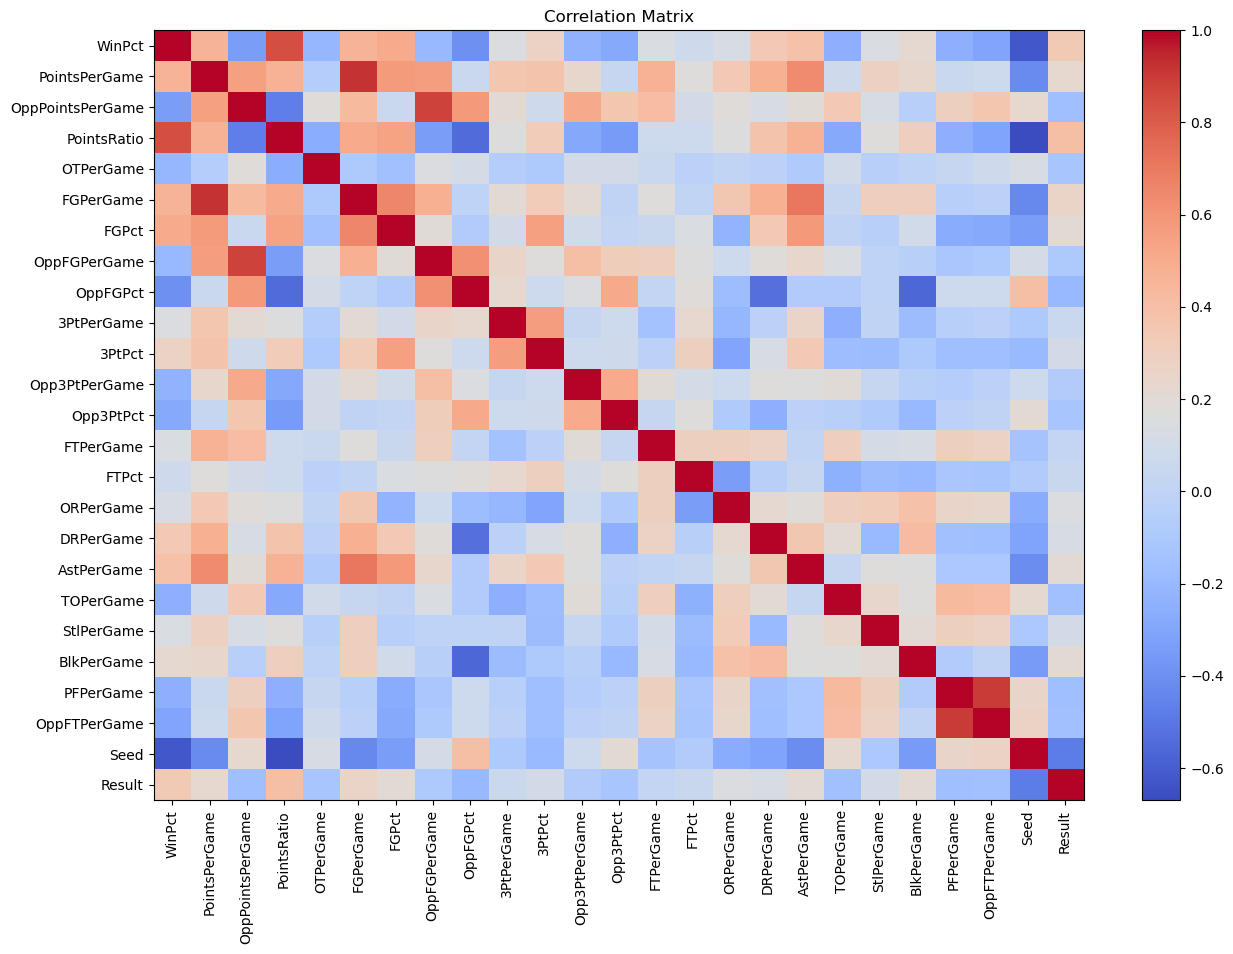

In [9]:
# Find correlations
corrs = round(TourneyStats.corr(), 2)
display(np.abs(corrs['Result']).sort_values(ascending=False))

# Display the correlation matrix
plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix')
plt.imshow(corrs, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns, rotation='vertical')
plt.yticks(range(len(corrs)), corrs.columns)
plt.show()

# Train model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import xgboost as xgb

In [11]:
# Prepare your data
X = TourneyStats.drop('Result', axis=1)
y = TourneyStats['Result']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

display(X_train)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


,WinPct,PointsPerGame,OppPointsPerGame,PointsRatio,OTPerGame,FGPerGame,FGPct,OppFGPerGame,OppFGPct,3PtPerGame,...,FTPct,ORPerGame,DRPerGame,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppFTPerGame,Seed
535,0.156250,0.625000,-4.031250,0.082824,0.062500,1.625000,0.034257,-0.375000,0.001261,0.375000,...,-0.068022,-1.656250,-0.375000,0.562500,-1.031250,0.406250,-0.437500,-0.312500,-2.406250,-1.0
674,-0.087879,3.766667,4.572727,-0.020431,0.066667,1.066667,0.016256,3.581818,0.029201,0.781818,...,0.049007,-3.293939,0.327273,-1.633333,0.093939,1.036364,-0.069697,-2.972727,-1.778788,9.0
1727,-0.100379,-10.979167,-8.405303,-0.026894,0.000947,-5.346591,0.010740,-4.292614,-0.026739,1.349432,...,0.037558,-4.150568,-1.005682,-1.991477,0.033144,-2.942235,0.553030,0.211174,-0.997159,-1.0
1378,-0.060920,1.229885,-3.529885,0.079486,-0.034483,0.991954,0.015220,-0.606897,0.016313,-0.441379,...,-0.027685,-0.010345,0.003448,1.767816,1.279310,1.822989,-2.375862,0.113793,-2.018391,-1.0
959,0.299242,10.991477,4.011364,0.093717,0.063447,3.804924,0.019072,2.235795,0.013039,0.870265,...,0.001239,2.546402,-0.399621,-0.688447,-1.088068,2.482955,-0.100379,-2.178030,-1.228220,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.025847,4.032086,8.982175,-0.107832,0.029412,2.388592,0.005301,4.555258,0.044364,-1.668449,...,-0.032807,0.679144,-1.260250,-0.894831,0.908200,-0.698752,1.506239,0.445633,0.480392,-8.0
905,-0.187500,-9.281250,-1.031250,-0.122538,0.062500,-4.062500,-0.058870,-0.562500,0.012695,0.968750,...,-0.076930,1.343750,-5.187500,0.187500,0.781250,3.093750,1.062500,-1.031250,-0.875000,-1.0
1096,0.181818,3.363636,-4.151515,0.111942,0.000000,3.575758,0.040078,-2.878788,-0.042884,-1.181818,...,0.026695,-0.060606,1.515152,2.363636,-0.969697,-0.303030,2.000000,1.484848,1.606061,-8.0
235,0.008046,-10.979310,-10.063218,0.012937,0.066667,-2.473563,0.001682,-3.973563,-0.026934,-0.963218,...,-0.035221,-3.934483,-1.165517,-2.798851,-3.420690,-0.596552,-0.397701,-1.979310,-1.532184,8.0


(2104, 24) (526, 24) (2104,) (526,)


In [12]:
# Random forest
rf = RandomForestClassifier(random_state=1)
rf = rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)

# Logistic regression
lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_scaled, y_train)
lr_score = lr.score(X_test_scaled, y_test)

# Naive bayes
nb = GaussianNB()
nb = nb.fit(X_train_scaled, y_train)
nb_score = nb.score(X_test_scaled, y_test)

print('Random forest score: {:.6f}'.format(rf_score))
print('Logistic regression score: {:.6f}'.format(lr_score))
print('Naive bayes score: {:.6f}'.format(nb_score))

print(classification_report(y_test, lr.predict(X_test_scaled)))

Random forest score: 0.714829
Logistic regression score: 0.722433
Naive bayes score: 0.684411
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73       271
         1.0       0.72      0.70      0.71       255

    accuracy                           0.72       526
   macro avg       0.72      0.72      0.72       526
weighted avg       0.72      0.72      0.72       526



In [13]:
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=10)
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=10)
nb_cv_scores = cross_val_score(nb, X_train_scaled, y_train, cv=10)

print('Random forest cross validation: {:.6f}'.format(rf_cv_scores.mean()))
print('Logistic regression cross validation: {:.6f}'.format(lr_cv_scores.mean()))
print('Naive bayes cross validation: {:.6f}'.format(nb_cv_scores.mean()))

Random forest cross validation: 0.687267
Logistic regression cross validation: 0.705310
Naive bayes cross validation: 0.672984


# Predict some games

In [14]:
# get team names
raw_df = RegSeasonStats.reset_index()

# Merge to get the winning team names
def get_df(season):
    TeamDf = raw_df[raw_df['Season'] == season]
    TeamNameDf = pd.merge(TeamDf, Teams[['TeamID', 'TeamName']], on='TeamID', how='left')
    return TeamNameDf

TeamNameDf = get_df(2023)
SeedsDf = pd.merge(TeamNameDf, Seeds[(Seeds['Season'] == 2023)])

# drop one play in team, we will handle this later
mask = SeedsDf['Seed'].str.contains('b', case=False, na=False)
SeedsDf = SeedsDf[~mask]

SeedsDf['Seed'] = SeedsDf['Seed'].str[1:3].astype(int)
SeedsDf = SeedsDf.sort_values(by='Seed', ignore_index=True)

display(SeedsDf)



,Season,TeamID,WinPct,PointsPerGame,OppPointsPerGame,PointsRatio,OTPerGame,FGPerGame,FGPct,OppFGPerGame,...,ORPerGame,DRPerGame,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppFTPerGame,TeamName,Seed
0,2023,1104,0.852941,82.176471,68.500000,1.199657,0.176471,27.764706,0.446336,23.941176,...,11.264706,29.617647,15.205882,13.588235,6.058824,5.058824,18.617647,15.088235,Alabama,1
1,2023,1345,0.852941,73.088235,62.735294,1.165026,0.029412,25.441176,0.459373,24.058824,...,11.029412,25.205882,15.500000,10.411765,4.794118,3.617647,13.705882,8.205882,Purdue,1
2,2023,1242,0.794118,74.941176,67.941176,1.103030,0.058824,27.647059,0.465577,24.205882,...,8.470588,24.764706,16.441176,12.058824,8.794118,3.764706,16.558824,13.147059,Kansas,1
3,2023,1222,0.911765,75.029412,56.500000,1.327954,0.000000,27.529412,0.461766,18.764706,...,11.676471,24.411765,14.823529,9.441176,8.323529,4.764706,16.558824,12.705882,Houston,1
4,2023,1112,0.823529,82.676471,71.500000,1.156314,0.000000,29.382353,0.495782,25.852941,...,8.823529,27.294118,19.176471,13.117647,6.117647,3.205882,17.029412,11.764706,Arizona,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2023,1436,0.687500,72.156250,66.718750,1.081499,0.093750,26.187500,0.471316,24.531250,...,5.281250,23.437500,13.656250,8.875000,5.593750,2.937500,14.937500,10.750000,Vermont,15
60,2023,1297,0.625000,67.187500,64.718750,1.038146,0.156250,24.093750,0.425967,23.000000,...,9.656250,20.093750,13.187500,10.531250,9.062500,2.593750,15.593750,11.281250,N Kentucky,16
61,2023,1369,0.515152,77.212121,77.696970,0.993760,0.151515,26.272727,0.433717,26.424242,...,7.636364,23.878788,13.424242,12.424242,6.666667,3.181818,21.484848,17.545455,SE Missouri St,16
62,2023,1192,0.531250,76.281250,75.968750,1.004114,0.093750,27.781250,0.451040,26.656250,...,9.875000,20.625000,14.312500,11.156250,7.437500,1.875000,19.125000,14.500000,F Dickinson,16


In [15]:
def predict_winner(team1, team2, season):
    # Get the stats of each team
    TeamDf = get_df(season)
    
    def get_seeds():
        season_df = SeasonSeeds.loc[season]
        # Get seed of team 1
        id1 = TeamNameDf.loc[TeamNameDf['TeamName'] == team1, 'TeamID'].values[0]
        seed1 = season_df.loc[id1]['Seed']
        # Get seed of team 2
        id2 = TeamNameDf.loc[TeamNameDf['TeamName'] == team2, 'TeamID'].values[0]
        seed2 = season_df.loc[id2]['Seed']
        return (int(seed1[1:3]), int(seed2[1:3]))
    
    team1_stats = TeamDf[TeamDf['TeamName'] == team1].drop(['Season', 'TeamID', 'TeamName'], axis=1)
    team2_stats = TeamDf[TeamDf['TeamName'] == team2].drop(['Season', 'TeamID', 'TeamName'], axis=1)
    
    # seed1, seed2 = get_seeds()
    team1_stats['Seed'] = SeedsDf[SeedsDf['TeamName'] == team1]['Seed']
    team2_stats['Seed'] = SeedsDf[SeedsDf['TeamName'] == team2]['Seed']
    
    print(team1_stats)
    print(team2_stats)
    diff = team1_stats.values - team2_stats.values
    
    # Scale the data
    diff_scaled = scaler.transform(diff)
    
    probs = lr.predict_proba(diff_scaled)
    
    # Assuming class 1 corresponds to team1 winning and class 0 to team2, adjust indices as needed
    team1_prob = probs[0][1]
    team2_prob = probs[0][0]
    
    
    
    winner = team1 if team1_prob > team2_prob else team2
    winning_prob = max(team1_prob, team2_prob)

    return winner, winning_prob


# Example usage (Make sure 'TeamNameDf', 'lr', and 'scaler' are correctly defined)
winner = predict_winner('Iona', 'Connecticut', 2023)
print("Predicted winner:", winner[0], '\nProbability:', f'{round(winner[1]*100, 2)}%')


       WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  OTPerGame  \
125  0.794118      76.382353              65.0     1.175113   0.029412   

     FGPerGame     FGPct  OppFGPerGame  OppFGPct  3PtPerGame  ...     FTPct  \
125  28.176471  0.460798     23.352941  0.408646    7.058824  ...  0.731343   

     ORPerGame  DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
125  10.323529  23.117647   15.029412  10.294118    7.470588    5.558824   

     PFPerGame  OppFTPerGame  Seed  
125  16.323529     12.529412   NaN  

[1 rows x 24 columns]
      WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  OTPerGame  \
56  0.757576      78.454545         65.030303     1.206431        0.0   

    FGPerGame     FGPct  OppFGPerGame  OppFGPct  3PtPerGame  ...     FTPct  \
56  27.606061  0.459869      22.30303  0.410028         9.0  ...  0.754414   

    ORPerGame  DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
56  11.787879  24.151515   17.272727  12.333333    6.545455    

/Users/kvnem/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Build bracket predictor

In [21]:
import math

def valid_teams(n):
    return 0 < n <= 16 and (n & (n - 1)) == 0

class Region:
    def __init__(self, region, season):
        
        # Generate team dataframe
        def generate_teams():
            # dataframe for region teams
            season_df = get_df(self.season)
            region_df = pd.merge(season_df, Seeds[(Seeds['Season'] == self.season) & (Seeds['Seed'].str[0] == region[0])])
            
            # # remove play in team for now
            mask = region_df['Seed'].str.contains('a', case=False, na=False)
            region_df = region_df[~mask]
            
            # sort teams based on seed
            region_df['Seed'] = region_df['Seed'].str[1:3].astype(int)
            region_df = region_df.sort_values(by='Seed', ignore_index=True)
            return region_df
        
        def generate_bracket():
            # get round 1
            matchups = [1,8,5,4,6,3,7,2]
            bracket = []
            r1 = [['',''] for _ in range(len(matchups))]
            for i in range(len(r1)):
                top = matchups[i] - 1
                r1[i][0], r1[i][1] = self.team_data.iloc[top]['TeamName'], self.team_data.iloc[-(top+1)]['TeamName']
            bracket.append(r1)
            # rest of rounds
            sub = 4
            while sub <= 16:
                l = [['', ''] for _ in range(len(self.team_data) // sub)]
                bracket.append(l)
                sub *= 2
            return bracket
        
        self.region = region
        self.season = season
        self.team_data = generate_teams()
        self.bracket = generate_bracket()
    
    def get_region(self):
        return self.region
    
    def get_season(self):
        return self.season
    
    def get_teams(self):
        return self.team_data
    
    def get_bracket(self):
        return self.bracket
    
    def get_round(self, teams):
        assert valid_teams(len(teams))
        return int(math.log(16 // len(teams), 2)) + 1 # formula to generate round
        
    def get_matchups(self):
        
        pass
    
    # def get_seed(self, team):
    #     return self.team_data.loc[self.team_data['TeamName'] == team, 'Seed'].values[0]
        
        
    def predict_game(self, team1, team2):
        # get team data
        team1_stats = self.team_data[self.team_data['TeamName'] == team1].drop(['Season', 'TeamID', 'TeamName'], axis=1)
        team2_stats = self.team_data[self.team_data['TeamName'] == team2].drop(['Season', 'TeamID', 'TeamName'], axis=1)
        
        print(repr(team1_stats))

        # generate model prediction
        diff = pd.DataFrame(team1_stats.values - team2_stats.values, columns=team1_stats.columns.values)
        diff_scaled = scaler.transform(diff)
        probs = lr.predict_proba(diff_scaled)
        
        # get win probabilities
        team1_prob = probs[0][1]
        team2_prob = probs[0][0]
        
        if team1_prob > team2_prob:
            team1_prob = max(0, team1_prob - 0.1)  # Ensure probability doesn't become negative
        else:
            team2_prob = max(0, team2_prob - 0.1)  # Ensure probability doesn't become negative

        # Determining the winner and the winning probability after adjustment
        winner = team1 if team1_prob > team2_prob else team2
        winning_prob = round(max(team1_prob, team2_prob), 4)

        return winner, winning_prob
    
    def predict_bracket(self):
        for i, round in enumerate(self.bracket[:-1]):  
            for j, game in enumerate(round):
                team1, team2 = game[0], game[1]
                winner, prob = self.predict_game(team1, team2)
                self.bracket[i + 1][j // 2][j % 2] = winner
                
    
    def predict_round(self, round):
        assert 1 <= round <= 4 and self.bracket[round - 1][0] != ['', '']
        
        pass
            
            
reg1 = Region('X', 2023)
# print(reg1.get_bracket())

# display(reg1.get_teams())
game = reg1.predict_game('Arizona', 'Missouri')
print(game)


        

     WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  OTPerGame  \
1  0.823529      82.676471              71.5     1.156314        0.0   

   FGPerGame     FGPct  OppFGPerGame  OppFGPct  3PtPerGame  ...     FTPct  \
1  29.382353  0.495782     25.852941  0.408457    8.588235  ...  0.708844   

   ORPerGame  DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
1   8.823529  27.294118   19.176471  13.117647    6.117647    3.205882   

   PFPerGame  OppFTPerGame  Seed  
1  17.029412     11.764706     2  

[1 rows x 24 columns]
('Missouri', 0.4817)


### To do:

- Convert to normal .py file
- Write code to evaluate performance on previous brackets
- Optimize it so that it can get those correct
- Build the frontend
- Develop Flask backend and connect


### Model Predictions
##### South
1 Alabama vs 16 Texas A&M CC - Alabama (10)  
8 Maryland vs 9 West Virginia - Maryland (0)  
5 San Diego St vs 12 Col Charleston - Col Charleston (0)  
4 Virginia vs 13 Furman - Furman (10)  
6 Creighton vs 11 NC State - Creighton (10)  
3 Baylor vs 14 UC Santa Barbara - Baylor (10)  
7 Missouri vs 10 Utah St - Missouri (10)  
2 Arizona vs 15 Princeton - Arizona (10)  

##### East
1 Purdue vs 16 Fairleigh Dickinson - Fairleigh Dickinson (10)
8 Memphis vs 9 FL Atlantic - FL Atlantic (10)
5 Duke vs 12 Oral Roberts - Duke (10)
4 Tennessee vs 13 Louisiana - Louisiana (0)
6 Kentucky vs 11 Providence - Kentucky (10)
3 Kansas St vs 14 Montana St - Kansas St (10)
7 Michigan St vs 14 USC - Michigan St (10)
2 Marquette vs 15 Vermont - Marquette (10)

##### Midwest
1 Houston vs 16 N Kentucky - Houston (10)
8 Iowa vs 9 Auburn - Auburn (10)
5 Miami vs 12 Drake - Drake (0)
4 Indiana vs 13 Kent St - Indiana (10)
6 Iowa St vs 11 Pittsburgh - Iowa St (0)
3 Xavier vs 14 Kennesaw St - Kennesaw St (0)
7 Texas A&M vs 10 Penn St - Penn St (10)
2 Texas vs 15 Colgate - Colgate (0)

##### West
1 Kansas vs 16 Howard - Howard (0)
8 Arkansas vs 9 Illinois - Arkansas (10)
5 Saint Mary's vs 12 VCU - Saint Mary's (10)
4 UConn vs 13 Iona - UConn (10)
6 TCU vs 11 Arizona St - Arizona St (0)
3 Gonzaga vs 14 Grand Canyon - Gonzaga (10)
2 UCLA vs 15 UNC Asheville - UNC Asheville (0)

##### Round 1 Total: 210

##### South
1 Alabama vs 9 West Virginia - Alabama (10)  
12 Furman vs 12 Col Charleston - Col Charleston (0)   
3 Baylor vs 6 Creighton - Baylor (0)
7 Missouri vs 2 Princeton - Missouri (0)  

##### East
9 FL Atlantic vs 16 Fairleigh Dickinson - Fairleigh Dickinson (10)
4 Tennessee vs 5 Duke - Duke (0)
3 Kansas St vs 6 Kentucky - Kansas St (10)
7 Michigan St vs 2 Marquette - Marquette (10)

##### Midwest
1 Houston vs 9 Auburn - Auburn (0)
4 Indiana vs 5 Miami -  Indiana (0)
6 Iowa St vs 11 Pittsburgh - Iowa St (0)
3 Xavier vs 14 Kennesaw St - Kennesaw St (0)
7 Texas A&M vs 10 Penn St - Penn St (10)
2 Texas vs 15 Colgate - Colgate (0)

##### West
1 Kansas vs 16 Howard - Howard (0)
8 Arkansas vs 9 Illinois - Arkansas (10)
5 Saint Mary's vs 12 VCU - Saint Mary's (10)
4 UConn vs 13 Iona - UConn (10)
6 TCU vs 11 Arizona St - Arizona St (0)
3 Gonzaga vs 14 Grand Canyon - Gonzaga (10)
2 UCLA vs 15 UNC Asheville - UNC Asheville (0)